--- Closed-form Solution ---
Intercept: 3.1052
Slope: 3.9844

--- Gradient Descent Solution ---
Intercept: 3.1052
Slope: 3.9844


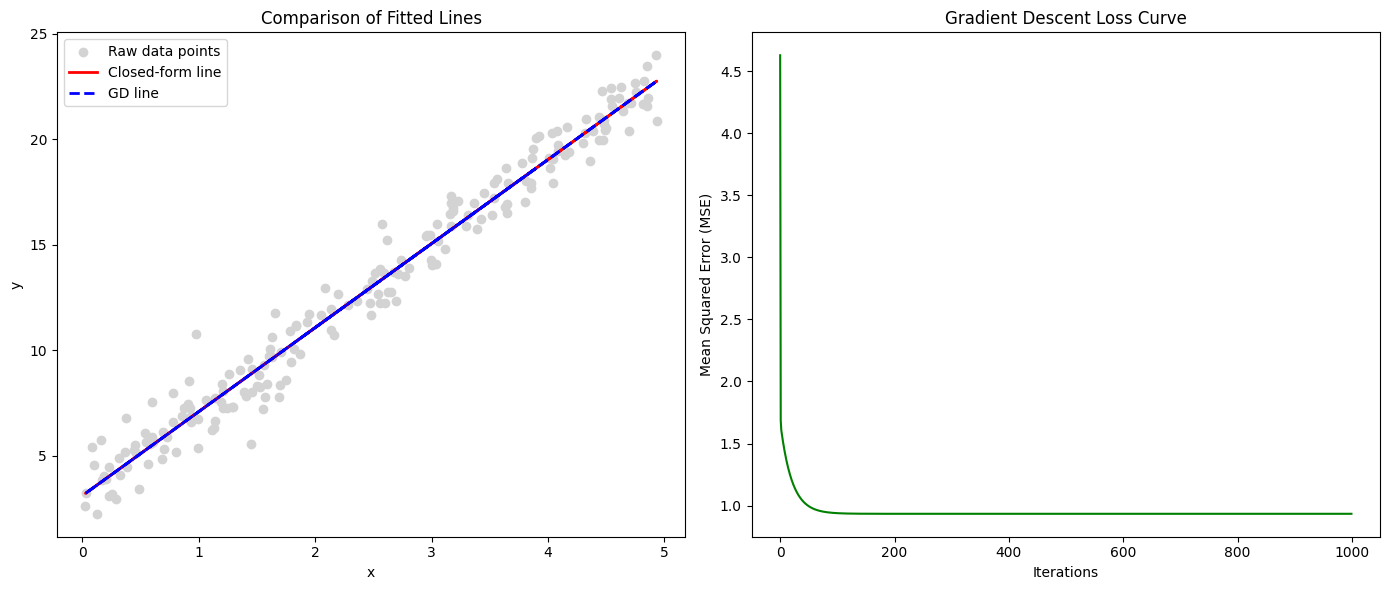

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset Generation

np.random.seed(42)
m = 200
X = 5 * np.random.rand(m, 1)

# y = 3 + 4x + Gaussian noise
y = 3 + 4 * X + np.random.randn(m, 1)

# Add a bias column of 1's to X
X_b = np.c_[np.ones((m, 1)), X]


# 2. Closed-form solution

# Compute theta = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the estimated intercept and slope
intercept_cf, slope_cf = theta_best[0][0], theta_best[1][0]
print("--- Closed-form Solution ---")
print(f"Intercept: {intercept_cf:.4f}")
print(f"Slope: {slope_cf:.4f}\n")


# 3. Gradient Descent Implementation

eta = 0.05
n_iterations = 1000
theta = np.array([[0.0], [0.0]])
loss_history = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    mse = np.mean((X_b.dot(theta) - y)**2)
    loss_history.append(mse)


intercept_gd, slope_gd = theta[0][0], theta[1][0]
print("--- Gradient Descent Solution ---")
print(f"Intercept: {intercept_gd:.4f}")
print(f"Slope: {slope_gd:.4f}")




plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(X, y, color='lightgray', label='Raw data points')
plt.plot(X, intercept_cf + slope_cf * X, color='red', label='Closed-form line', linewidth=2) # [cite: 90]
plt.plot(X, intercept_gd + slope_gd * X, color='blue', linestyle='--', label='GD line', linewidth=2) # [cite: 91]
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Fitted Lines')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), loss_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Gradient Descent Loss Curve')

plt.tight_layout()
plt.show()